# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [1]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
#pip install plotly==5.8.2


In [3]:
#import plotly.express as px

In [4]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [10]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [11]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visualization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [13]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [14]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

In [15]:
### Defining groups
df_fhain = df_district.get_group('Friedrichshain-Kreuzberg')

In [16]:
### Filter out top 10 District trees

df_trees_in_fhain = df_fhain['Baumart deutsch'].value_counts()

In [17]:
type(df_trees_in_fhain)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Friedrichshain-Kreuzberg'}>

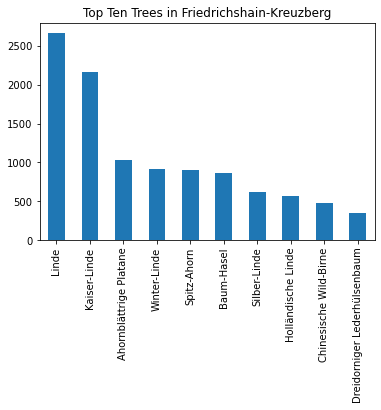

In [18]:
df_trees_in_fhain.head(10).plot.bar(title="Top Ten Trees in Friedrichshain-Kreuzberg")

# Top 10 Strees with most trees per District Visualization


In [19]:
df_streets_in_fhain = df_fhain['Straße'].value_counts()

<AxesSubplot:title={'center':'Streets with most Trees in Friedrichshain-Kreuzberg'}>

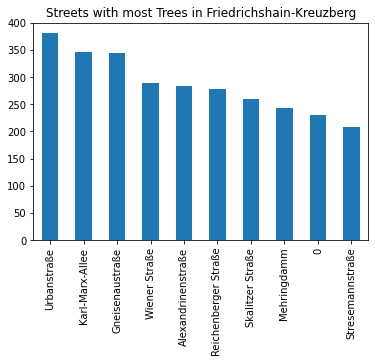

In [20]:
df_streets_in_fhain.head(10).plot.bar(title="Streets with most Trees in Friedrichshain-Kreuzberg")

## Top Trees
1. oldest
2. highest

In [21]:
df_fhain['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 42179     7.0
42180    16.0
42181    14.0
42182    17.0
42183    14.0
         ... 
58679     8.0
58680     8.5
58681     8.5
58682     8.0
58683     8.5
Name: Baumhöhe in m, Length: 16505, dtype: float64>

In [23]:
### Heighest Tree
max_height_in_fhain = df_fhain['Baumhöhe in m'].idxmax()
heighest_tree_in_fhain = df_fhain.loc[[max_height_in_fhain]]
print(heighest_tree_in_fhain)

       Unnamed: 0                 ID Baum Nr. Objektnr.            Objektname  \
43944       43944  00008100:0016042b      134      3637  Reichenberger Straße   

      Baumart deutsch             Baumart botanisch Gattung botanisch  \
43944   Hybrid-Pappel  Populus x canadensis Hybride           POPULUS   

                     Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
43944  Reichenberger Straße       0              0        1853         169   

       Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
43944                    15.0               525.0           28.0   

                         Bezirk  
43944  Friedrichshain-Kreuzberg  


In [25]:
### Oldest Tree
max_age_in_fhain = df_fhain['Standalter'].idxmax()
oldest_tree_in_fhain = df_fhain.loc[[max_age_in_fhain]]
print(oldest_tree_in_fhain)

       Unnamed: 0                 ID Baum Nr. Objektnr.     Objektname  \
46650       46650  00008100:00163dcf      3/1      4737  Waterloo-Ufer   

      Baumart deutsch     Baumart botanisch Gattung botanisch         Straße  \
46650         Robinie  Robinia pseudoacacia           ROBINIA  Waterloo-Ufer   

      Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  Krone Durchmesser in m  \
46650       0              0        1760         262                     7.0   

       Stamm Umfang in cm  Baumhöhe in m                    Bezirk  
46650               276.0           15.0  Friedrichshain-Kreuzberg  
